In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from scipy import stats
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

df = pd.read_csv('mskcc.txt', sep = "	")
#df=pd.read_table('mskcc.txt', sep = "	", index_col=['PATIENT_ID','Tumor_Sample_Barcode'])
#df.head()

X=df.loc[:,'ABL1':'ZRSR2']
X['PATIENT_ID']=df.loc[:,'PATIENT_ID']
#X.head



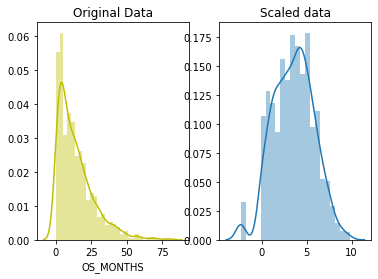

,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,...,ONCOTREE_CODE_ARMM,ONCOTREE_CODE_LUAS,ONCOTREE_CODE_CUPNOS,ONCOTREE_CODE_READ,ONCOTREE_CODE_URMM,ONCOTREE_CODE_AODG,CANCER_TYPE_Melanoma,AGE_GROUP_31-50,ONCOTREE_CODE_NETNOS,ONCOTREE_CODE_TSTAD,ONCOTREE_CODE_ODG,ONCOTREE_CODE_ILC,AGE_GROUP_61-70,ONCOTREE_CODE_USCC,ONCOTREE_CODE_LUNE,ONCOTREE_CODE_NPC,ONCOTREE_CODE_HPHSC,ONCOTREE_CODE_ASTR,ONCOTREE_CODE_ESCC,"CANCER_TYPE_Skin Cancer, Non-Melanoma",ONCOTREE_CODE_GEJ,ONCOTREE_CODE_CCRCC,ONCOTREE_CODE_UDMN,ONCOTREE_CODE_HNSC,AGE_GROUP_<30
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
#PREPROCESSING OF FEATURES

#encoding OS_STATUS
labelenc = preprocessing.LabelEncoder()
labelenc.fit(df['OS_STATUS'])
status_trans = labelenc.transform(df['OS_STATUS'])
df['OS_STATUS_TRANS']=status_trans

#encoding TMB_SCORE, which has exponential distribution
#Hence we use BOX-COX transformation to scale the data

TMB_SCORE_TRANS,_ = stats.boxcox(df['TMB_SCORE'])
X['TMB_SCORE_TRANS'] = TMB_SCORE_TRANS
#fig, ax=plt.subplots(1,2)
#sns.distplot(df['TMB_SCORE'], ax=ax[0], color='y')
#ax[0].set_title("Original Data")
#sns.distplot(TMB_SCORE_TRANS, ax=ax[1])
#ax[1].set_title("Scaled data")
#plt.show()


#encoding OS_MONTHS, which has exponential distribution
#Hence we use BOX-COX transformation to scale the data
OS_MONTHS_TRANS,_ = stats.boxcox(df['OS_MONTHS']+0.01)
#X['OS_MONTHS_TRANS'] = OS_MONTHS_TRANS
fig, ax=plt.subplots(1,2)
sns.distplot(df['OS_MONTHS'], ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(OS_MONTHS_TRANS, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

#encoding DRUG_TYPE
X['DRUG_TYPE_PD1']=[1 if any([drg_val=='PD-1/PDL-1', drg_val=='Combo']) else 0 for drg_val in df['DRUG_TYPE']]
X['DRUG_TYPE_CTLA4']=[1 if any([drg_val=='CTLA4', drg_val=='Combo']) else 0 for drg_val in df['DRUG_TYPE']]
#df['DRUG_TYPE_PD1']=DRUG_TYPE_PD1

#encoding AGE_GROUP
#cleaning data values
df.replace({'AGE_GROUP' : { '>71' : '71-100', '<30' : '0-30' }})

get_dummy_cols = ['SEX', 'AGE_GROUP', 'SAMPLE_TYPE', 'ONCOTREE_CODE', 'CANCER_TYPE']

df_copy = pd.get_dummies(df, columns=get_dummy_cols, prefix = get_dummy_cols)
#df_copy.head()


number_of_dummy=len(df_copy.columns)-len(df.columns)
dummy_list=list(set(df_copy.columns)-set(df.columns))
to_be_appended=df_copy.loc[:,dummy_list]
to_be_appended['PATIENT_ID']=df.loc[:,'PATIENT_ID']
#to_be_appended.head()
#list(df_copy.loc[:,dummy_list[0]])
X=pd.merge(X,to_be_appended,on='PATIENT_ID')
#X.reset_index(drop=True, inplace=True)
X.drop('PATIENT_ID',axis=1,inplace=True)
#del X['PATIENT_ID']
X.head()
#X['PATIENT_ID']
#df_copy.columns[(-1)*number_of_dummy-2]







Accuracy:0.6129032258064516
[[125  77]
 [ 79 122]]


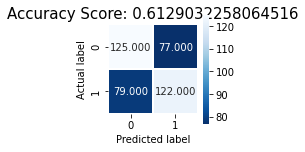

In [3]:
#selecting training and testing
#X=df.loc[:,'ABL1':'ZRSR2']
y=df['OS_STATUS_TRANS']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
y_predictions = logistic_regression_model.predict(x_test)
score = logistic_regression_model.score(x_test, y_test)
print("Accuracy:"+str(score))

cm = metrics.confusion_matrix(y_test, y_predictions)
print(cm)

#Plotting heat map
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
#bk = fs.SelectKBest(fs.f_classif, 3)
#bk.fit(X, y)
#X_trans = bk.transform(X)
#print(X_trans)

#f1_list = []
#for k in range(1, 15):
#    bk = fs.SelectKBest(fs.f_classif, k)
#    bk.fit(X, y)
#    X_trans = bk.transform(X)
#    train_x, test_x, train_y, test_y = train_test_split(X_trans,
#                                                        y,
#                                                        test_size=0.2,
#                                                        random_state=0)
#    lr = LogisticRegression()
#    lr.fit(train_x, train_y)
#    y_pred = lr.predict(test_x)
#    f1 = metrics.f1_score(test_y, y_pred)
#   f1_list.append(f1)

#fig, axe = plt.subplots(dpi = 300)
#axe.plot(range(1, 15), f1_list)
#axe.set_xlabel("best k features")
#axe.set_ylabel("F1-score")
#fig.savefig("img.png")
#plt.close(fig)
#df.head()



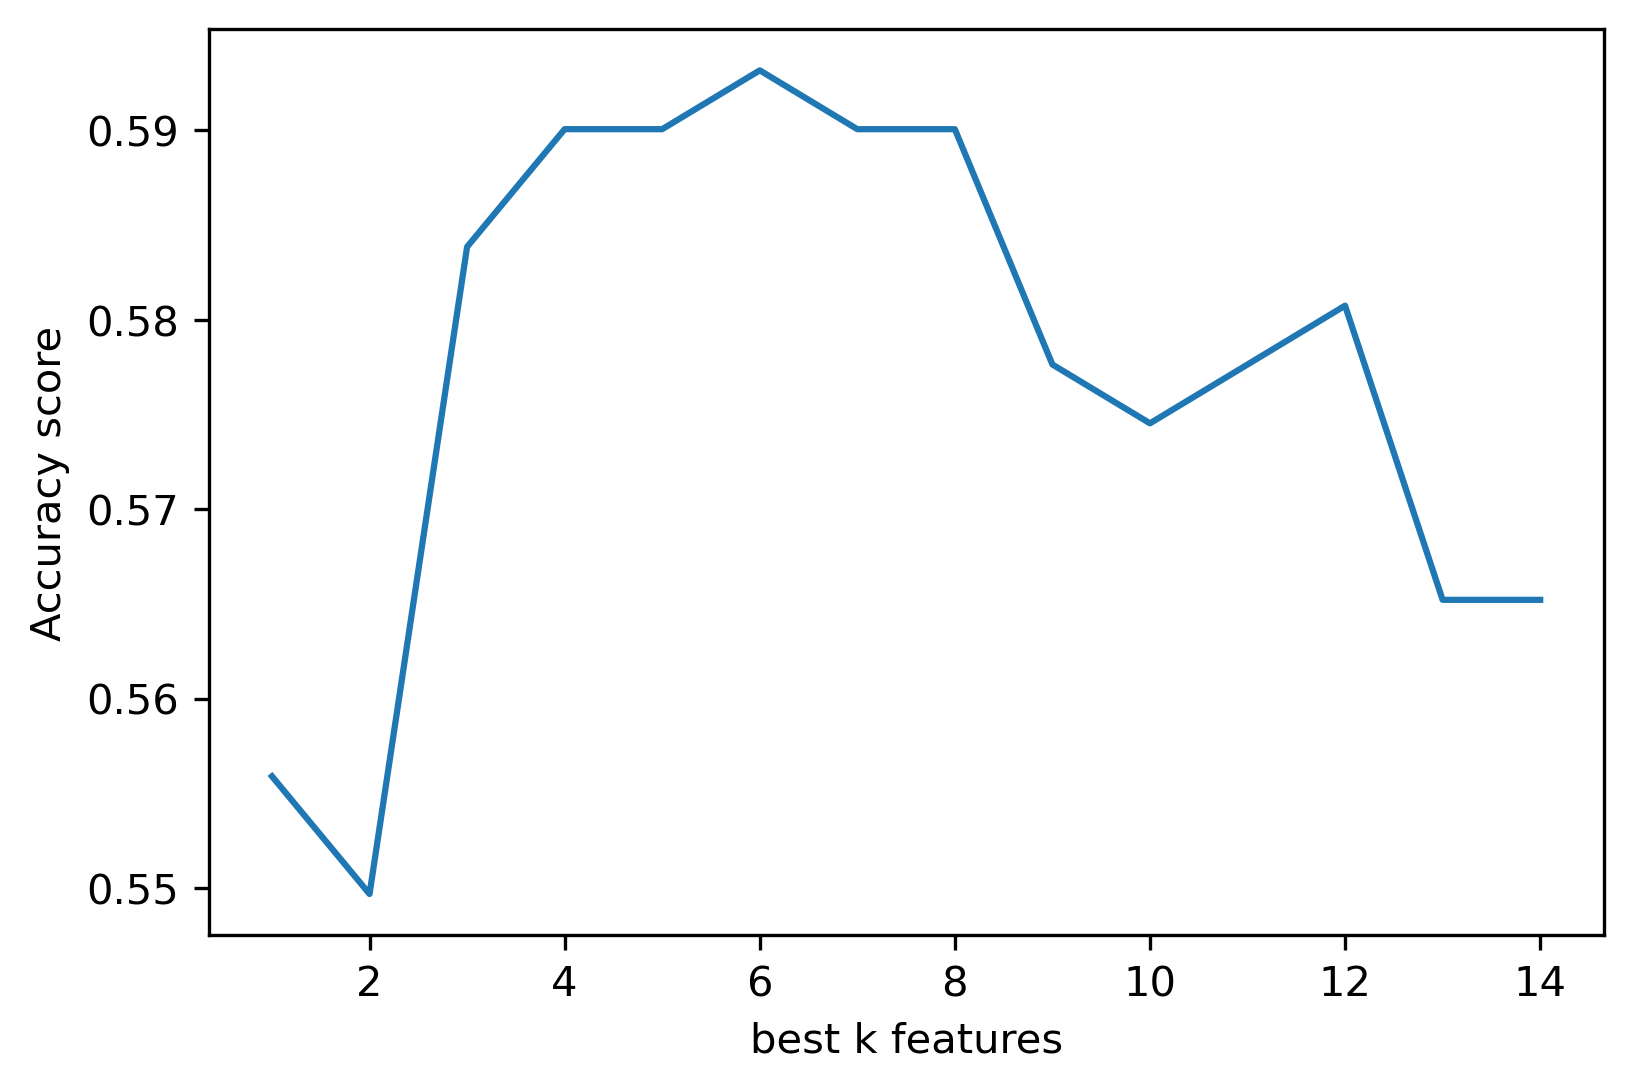

In [4]:
#bk = fs.SelectKBest(fs.f_classif, k=3)
#bk.fit(X_filter, y)
#X_trans = bk.transform(X_filter)
#X_trans

accuracy_list = []
for select_k in range(1, 15):
    bk = fs.SelectKBest(fs.f_classif, k=select_k)
    bk.fit(X, y)
    X_trans = bk.transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_train, y_train)
    y_predictions = logistic_regression_model.predict(x_test)
    #score = metrics.f1_score(y_test, y_predictions)
    score = logistic_regression_model.score(x_test, y_test)
    accuracy_list.append(score)


fig, axe = plt.subplots(dpi = 300)
axe.plot(range(1, 15), accuracy_list)
axe.set_xlabel("best k features")
axe.set_ylabel("Accuracy score")
plt.show()
#fig.savefig("output/img.png")
#plt.close(fig)

ONCOTREE_CODE_LUAD CANCER_TYPE_Non-Small Cell Lung Cancer
SAMPLE_TYPE_Primary SAMPLE_TYPE_Metastasis
SEX_Female SEX_Male
CANCER_TYPE_Melanoma ONCOTREE_CODE_SKCM
['ONCOTREE_CODE_LUAD', 'SAMPLE_TYPE_Primary', 'SEX_Female', 'CANCER_TYPE_Melanoma']


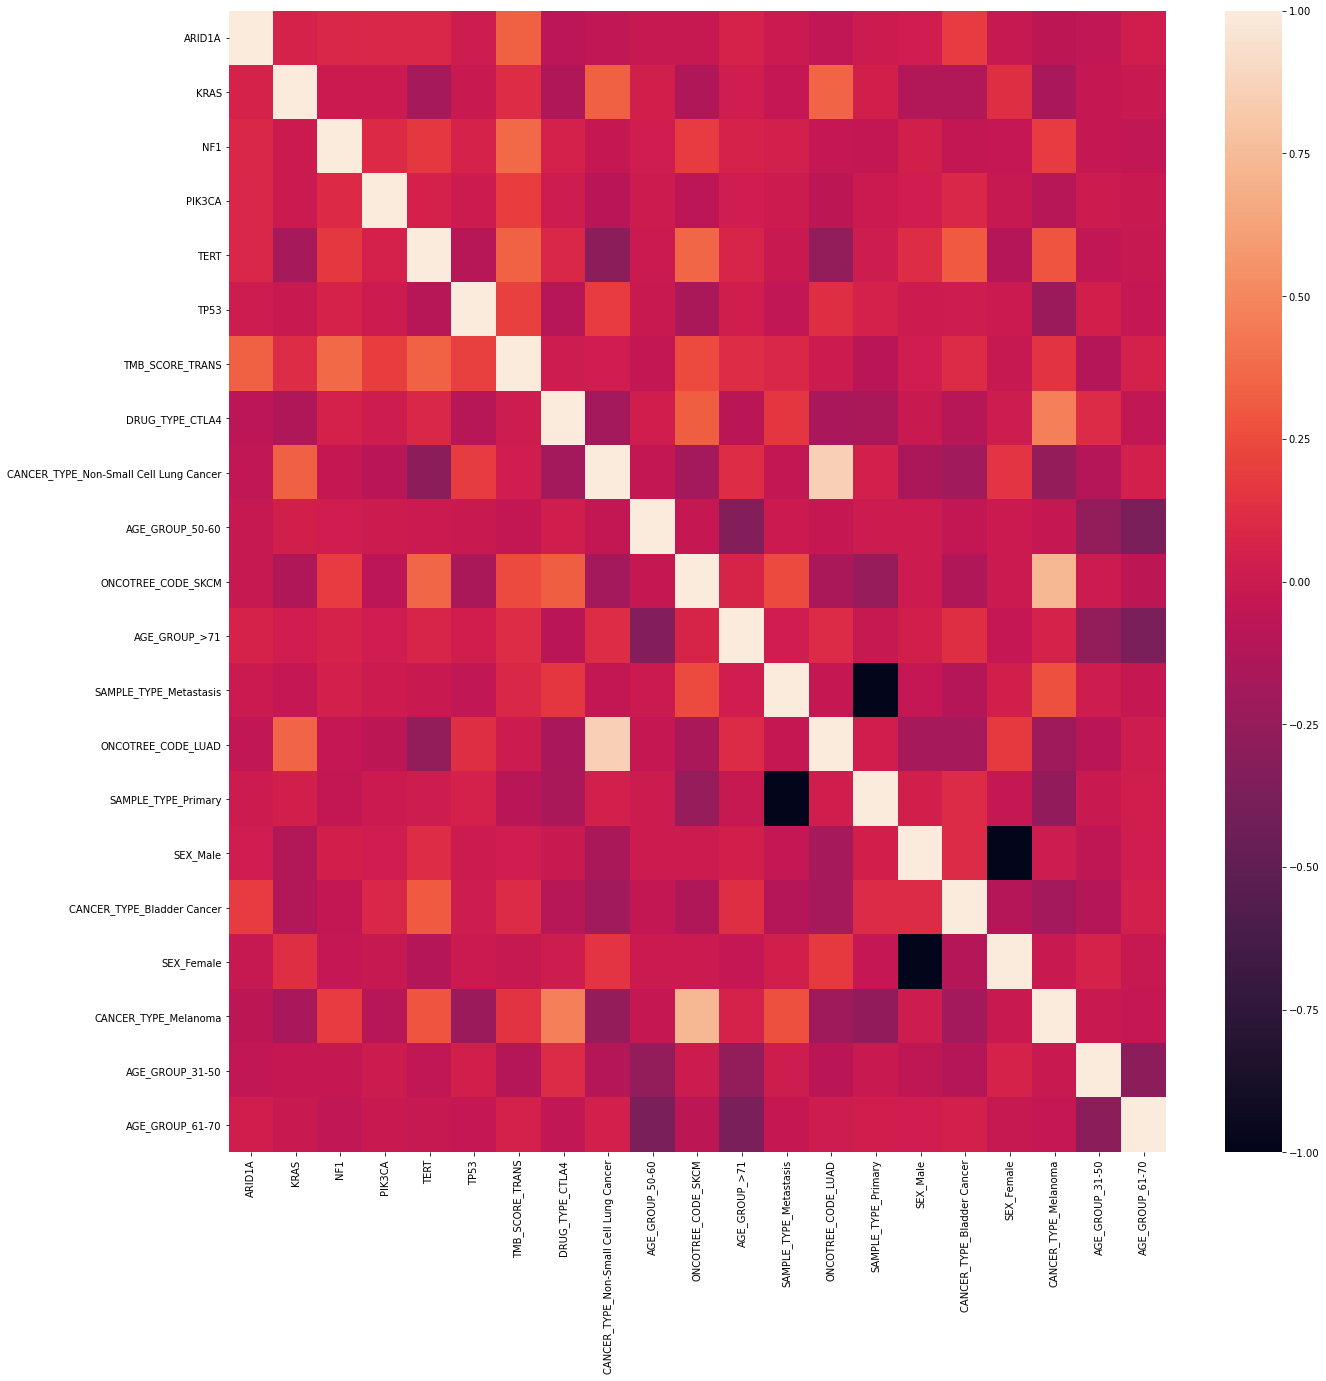

In [5]:
#Feature Selection

#Filter methods
lenp=[]
for i in range(0,24):
    var = fs.VarianceThreshold(threshold=(i/100))
    var.fit(X)
    dropped_columns = [column for column in X.columns
                    if column not in X.columns[var.get_support()]]
    lenp.append(len(dropped_columns))
#print(lenp)

var = fs.VarianceThreshold(threshold=0.1)
var.fit(X)
dropped_columns = [column for column in X.columns
                    if column not in X.columns[var.get_support()]]

#X_trans = var.transform(X)
X_filter1=X.drop(labels=dropped_columns, axis=1, inplace=False)
#X.head()
#len(dropped_columns)
#X.head()
#len(X.columns)

corr_matrix = X_filter1.corr()
#print(corr_matrix)
len_corr,_ = corr_matrix.shape
#print(len_corr)
plt.figure(figsize=(len_corr,len_corr))
sns.heatmap(corr_matrix)

corr_features=[]
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(corr_matrix.columns[i],corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            corr_features.append(colname)

print(corr_features)
            
X_filter=X_filter1.drop(labels=corr_features, axis=1, inplace=False)
X_filter=X_filter1.drop(labels=corr_features, axis=1, inplace=False)
#X_filter.head()





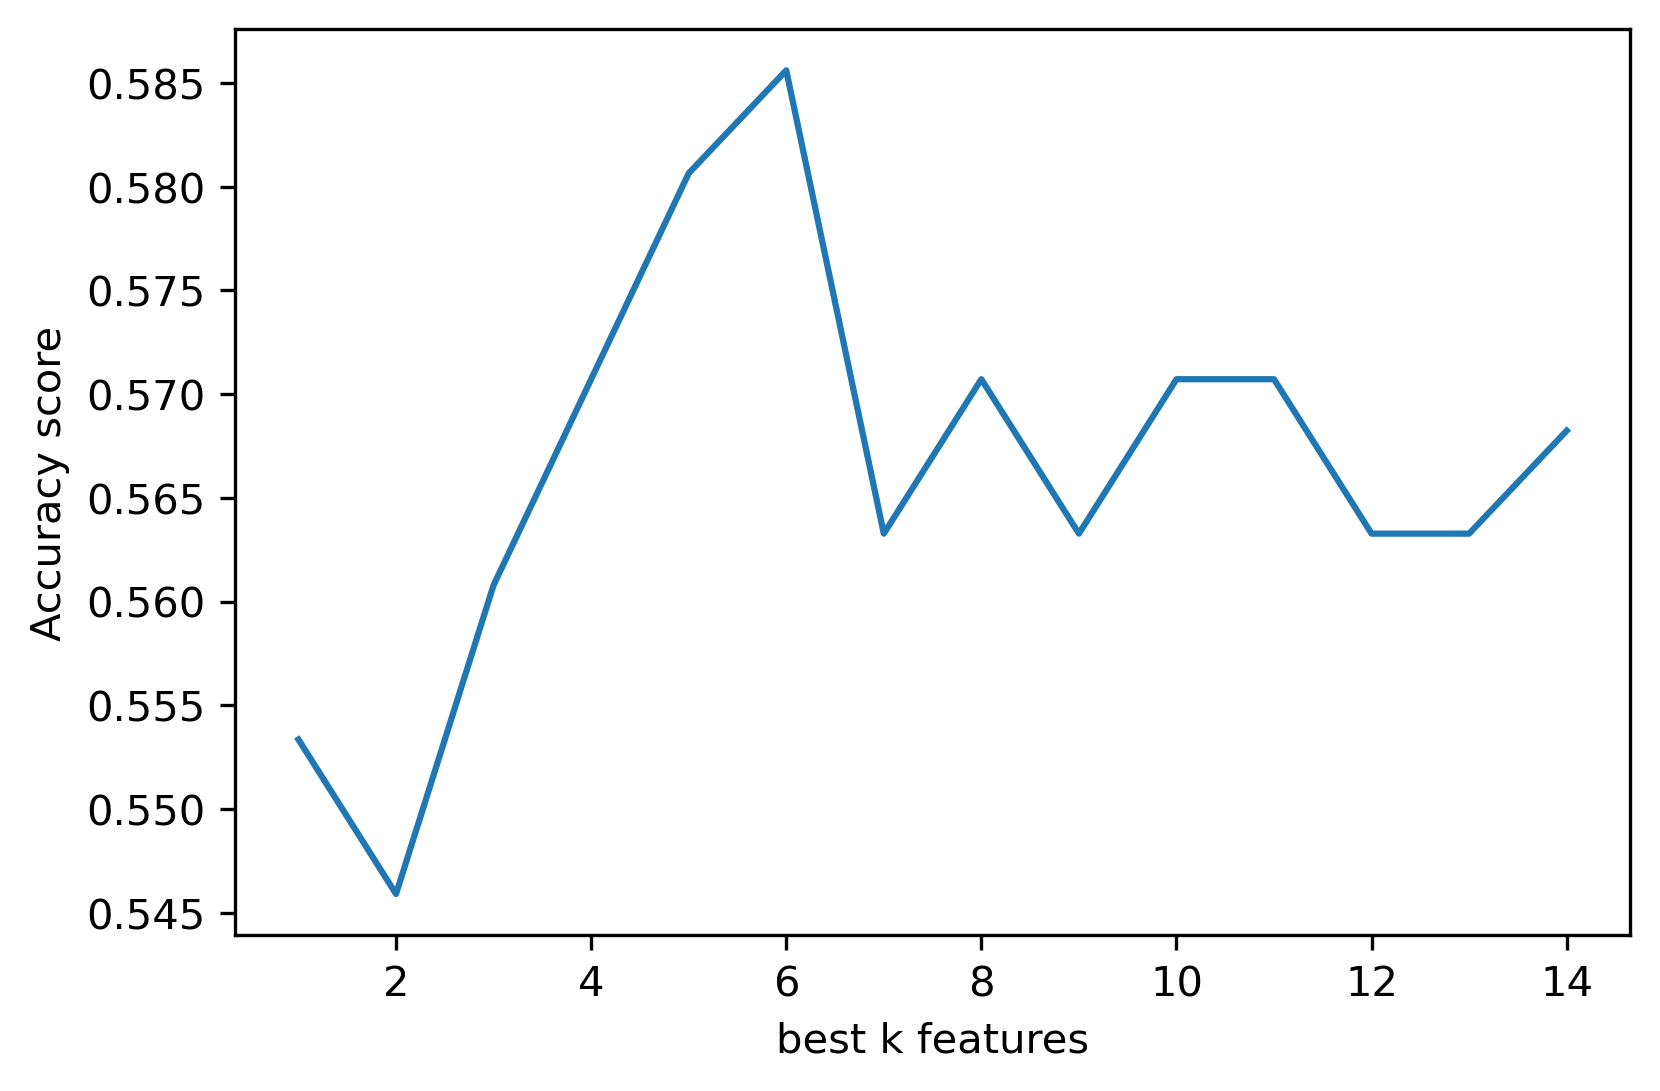

In [6]:
#bk = fs.SelectKBest(fs.f_classif, k=3)
#bk.fit(X_filter, y)
#X_trans = bk.transform(X_filter)
#X_trans

accuracy_list = []
for select_k in range(1, 15):
    bk = fs.SelectKBest(fs.f_classif, k=select_k)
    bk.fit(X_filter, y)
    X_trans = bk.transform(X_filter)
    x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=42)
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_train, y_train)
    y_predictions = logistic_regression_model.predict(x_test)
    #score = metrics.f1_score(y_test, y_predictions)
    score = logistic_regression_model.score(x_test, y_test)
    accuracy_list.append(score)


fig, axe = plt.subplots(dpi = 300)
axe.plot(range(1, 15), accuracy_list)
axe.set_xlabel("best k features")
axe.set_ylabel("Accuracy score")
plt.show()
#fig.savefig("output/img.png")
#plt.close(fig)

In [7]:
bk = fs.SelectKBest(fs.f_classif, k=6)
bk.fit(X_filter, y)
X_trans = bk.transform(X_filter)

#C = np.logspace(-4, 4, num=20)
#penalty = ['l2']
#solver = ['liblinear', 'saga', 'newton-cg', 'lbfgs']
#hyperparameters = dict(C=C, penalty=penalty, solver=solver)
#logistic = LogisticRegression()
#gridsearch = GridSearchCV(logistic, hyperparameters)
#best_model_grid = gridsearch.fit(X_filter, y)
#print(best_model_grid.best_estimator_)
#print(best_model_grid.best_score_)

#fig.savefig("output/img.png")
#plt.close(fig)

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l2','l1']
c_values = np.logspace(-4, 4, num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_trans, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.594824 using {'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=42),
           'grid': {"C":np.logspace(-3,3,10), "penalty":["l2"]},
           'classifier__solver' : ['liblinear', 'newton-cg','saga']},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {"n_neighbors":np.arange(8)+1}},
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=42),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=42),
           'grid': {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}},
          
          {'name': 'svm_rbf', 'label': 'SVC (RBF)',
           'classifier':SVC(random_state=42),
           'grid': {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}}]


def model_selection(classifier, name, grid, X_train, y_train, scoring):
    
    gridsearch_cv=GridSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring)
    
    gridsearch_cv.fit(X_train, y_train)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['score'] = gridsearch_cv.best_score_
    
    return(results_dict)

results = [model_selection(m['classifier'],m['name'],m['grid'],X_trans,y,'accuracy') for m in models]

results_df = pd.DataFrame(results).sort_values(by='score', ascending = False)
print(results_df)

In [291]:
len(df['TMB_SCORE'].unique())


267

In [8]:
df['OS_MONTHS'].describe()


count    1610.000000
mean       14.108075
std        12.869793
min         0.000000
25%         4.000000
50%        11.000000
75%        20.000000
max        80.000000
Name: OS_MONTHS, dtype: float64

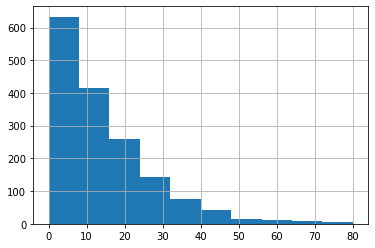

In [9]:

df['OS_MONTHS'].hist()

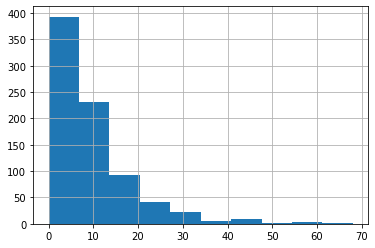

In [283]:
select_rows=df.loc[df['OS_STATUS']=='DECEASED']
select_rows['OS_MONTHS'].hist()

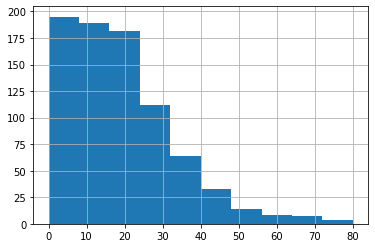

In [284]:
select_rows=df.loc[df['OS_STATUS']=='LIVING']
select_rows['OS_MONTHS'].hist()